## Synopsis     
      
            Dataset of Used Bikes and their Prices with features like power, Kilometers Driven etc
            This dataset contains around 32K records of used bike prices in India. The data has been collected from one of the leading online portals to sell used bikes in India via web scrapping 
            First thing that i found in the data set is how many brands are available in tha data set.The data which i Have Collected does Show a large Number of Five-year-old bikes Compared to the 3-year-old bikes,but I prefer choosing 3-Year-old Bikes to satisfy my customers.
            In my data there are four unique owners are available I have choosen the first and second owner because their bikes were more reliable and suggestable.
            First owner bikes and Second owner bike are to be mostly liked by customers and the bikes which have less travelled in KMS and less in Netamount can be sugggested to the buyers, and to find which brand bikes are mostly liked by the customers.To find which aged bike is been preferd by customers.to find lowest budgeted bike in suitable condition to suggest customers.

## Dataset of Used Bikes and their Prices with features like power, Kilometers Driven etc


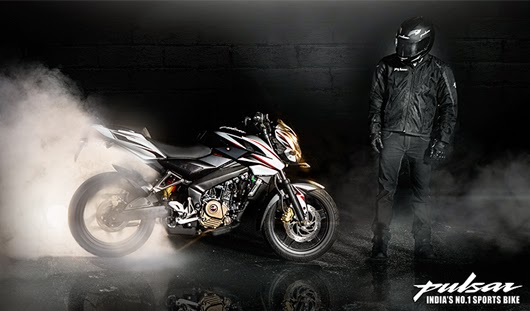

# INDEX
     *About This Data
     *Importing Library
     *Reading Data
     *Data Preprocesing 
     *Data Analysis
     *Modeling

# About This Data


* This dataset contains around 32K records of used bike prices in India. The data has been collected from one of the leading online portals to sell used bikes in India via web scrapping.

# Dataset Information


## bike_name 
            The name of the bike's model.
            It contains some additional information like model ,engine etc.


## kms_driven 
            Total kilometers the bike has been driven.

## Owner  
        The represents which type of owner the bike has like it is first owner which means the current owner had bought the this bike as new.
        second owner means the bike has been sold to this owner from first owner and so on.

## City  
        The location of the seller.
 
## Power 
        Power of the bike in CC

## Price   
        This is the target variable of the dataset. It is in Indian rupee

# Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [2]:
df=pd.read_csv(r"C:\Users\param\Downloads\Used_Bikes.csv")

Data cleaning

In [3]:
df.shape

(32648, 8)

In [4]:
df.sample(10)

,bike_name,price,city,kms_driven,owner,age,power,brand
12486,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
13994,Royal Enfield Bullet Electra 350cc,105000.0,Delhi,20000.0,First Owner,4.0,350.0,Royal Enfield
10835,Bajaj Avenger Street 220,80000.0,Hyderabad,7127.0,First Owner,5.0,220.0,Bajaj
14302,Hero Hunk Rear Disc 150cc,25000.0,Delhi,48587.0,First Owner,8.0,150.0,Hero
31033,Bajaj Platina 100cc,23000.0,Lucknow,20000.0,First Owner,6.0,100.0,Bajaj
27925,Hero Hunk Rear Disc 150cc,25000.0,Delhi,48587.0,First Owner,8.0,150.0,Hero
11276,Hero CBZ Xtreme 150cc,11900.0,Noida,34968.0,First Owner,14.0,150.0,Hero
24054,Hero CD Deluxe 100cc,18000.0,Chennai,22824.0,First Owner,8.0,100.0,Hero
9768,Bajaj Avenger 220cc,35000.0,Bangalore,60000.0,First Owner,9.0,220.0,Bajaj
27372,Bajaj Pulsar NS200,48000.0,Allahabad,41939.0,First Owner,8.0,200.0,Bajaj


In [5]:
df.tail()

,bike_name,price,city,kms_driven,owner,age,power,brand
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero
32647,Bajaj Pulsar 150cc,22000.0,Pune,60857.0,First Owner,13.0,150.0,Bajaj


In [6]:
df.columns

Index(['bike_name', 'price', 'city', 'kms_driven', 'owner', 'age', 'power',
       'brand'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.corr()

,price,kms_driven,age,power
price,1.000000,-0.313955,-0.399133,0.862376
kms_driven,-0.313955,1.000000,0.484684,-0.264016
age,-0.399133,0.484684,1.000000,-0.337035
power,0.862376,-0.264016,-0.337035,1.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,32648.0,68295.417637,90718.595205,4400.0,25000.0,43000.0,80000.0,1900000.0
kms_driven,32648.0,26344.625184,22208.527695,1.0,12000.0,20373.0,35000.0,750000.0
age,32648.0,8.048211,4.031700,1.0,5.0,7.0,10.0,63.0
power,32648.0,213.511302,134.428868,100.0,150.0,150.0,220.0,1800.0


# Data Preprocessing

In [11]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth Owner Or More'], dtype=object)

In [12]:
df['city'].nunique()

443

In [13]:
df['city'].unique()

array(['Ahmedabad', 'Delhi', 'Bangalore', 'Mumbai', 'Kalyan', 'Faridabad',
       'Mettur', 'Hyderabad', 'Kaithal', 'Gurgaon', 'Pune', 'Noida',
       'Nashik', 'Kochi', 'Allahabad', 'Samastipur', 'Nadiad', 'Lucknow',
       'Jaipur', 'Karnal', 'Gorakhpur', 'Vidisha', 'Hosur', 'Bagalkot',
       'Baripara', 'Agra', 'Dharwad', 'Vadodara', 'Jalandhar', 'Surat',
       'Chennai', 'Navi Mumbai', 'Gandhidham', 'Visakhapatnam',
       'Thrissur', 'Kolkata', 'Ernakulam', 'Barasat', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Bhopal', 'Hamirpur(hp)', 'Kottayam',
       'Arrah', 'Patiala', 'Ranga Reddy', 'Mandi', 'Ludhiana', 'Mandya',
       'Siliguri', 'Aurangabad', 'Kanpur', 'Bhilwara', 'Meerut', 'Rewari',
       'Ahmednagar', 'Wardha', 'Chandigarh', 'Ranchi', 'Panvel', 'Thane',
       'Jabalpur', 'Kota', 'Rohtak', 'Rajkot', 'Varanasi', '24 Pargana',
       'Banka', 'Nagpur', 'Banki', 'Pali', 'Chhatarpur', 'Katihar',
       'Mohali', 'Rudrapur', 'Coimbatore', 'Jajpur', 'Mysore', 'Adoni',

In [14]:
df['bike_name'].nunique()

471

In [15]:
df['bike_name'].unique()

array(['TVS Star City Plus Dual Tone 110cc',
       'Royal Enfield Classic 350cc', 'Triumph Daytona 675R',
       'TVS Apache RTR 180cc', 'Yamaha FZ S V 2.0 150cc-Ltd. Edition',
       'Yamaha FZs 150cc', 'Honda CB Hornet 160R  ABS DLX',
       'Hero Splendor Plus Self Alloy 100cc',
       'Royal Enfield Thunderbird X 350cc',
       'Royal Enfield Classic Desert Storm 500cc',
       'Yamaha YZF-R15 2.0 150cc', 'Yamaha FZ25 250cc',
       'Bajaj Pulsar NS200', 'Bajaj Discover 100M', 'Bajaj Discover 125M',
       'Bajaj Pulsar NS200 ABS', 'Bajaj Pulsar RS200 ABS',
       'Suzuki Gixxer SF 150cc', 'Benelli 302R 300CC',
       'Hero Splendor iSmart Plus IBS 110cc',
       'Royal Enfield Classic Chrome 500cc', 'Yamaha FZ V 2.0 150cc',
       'Hero Super Splendor 125cc', 'Honda CBF Stunner 125cc',
       'Bajaj Pulsar 150cc', 'Honda X-Blade 160CC ABS',
       'Bajaj Avenger 220cc', 'KTM RC 390cc', 'Honda CB Unicorn 150cc',
       'KTM Duke 200cc', 'Honda CBR 150R 150cc',
       'Royal Enfiel

In [16]:
df['brand'].nunique()

23

# Checking for null values

<AxesSubplot:>

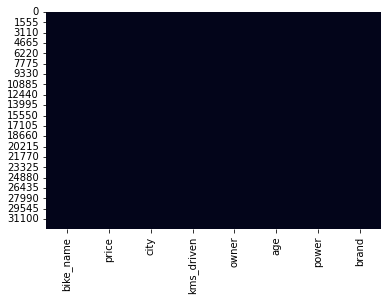

In [17]:
sns.heatmap(df.isnull(), cbar=False)

NO NULL VALUES IN OUR DATASET

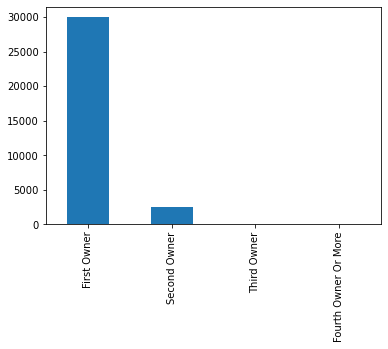

In [18]:
df['owner'].value_counts().plot(kind='bar')

plt.show()

<AxesSubplot:>

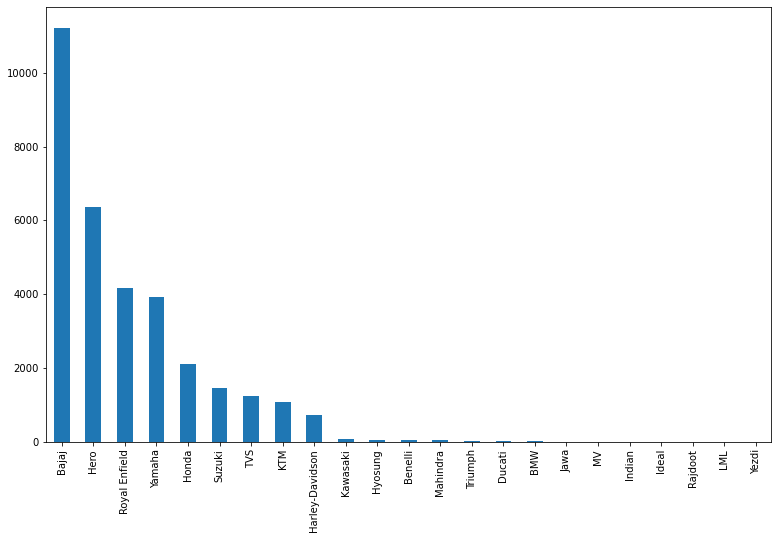

In [19]:
BIKE=df['brand'].value_counts().plot(kind='bar',figsize=(13,8))
BIKE

  # Insights

*  Among all the brands of bikes Bajaj stands first in total count 
of bikes.
*  So we can consider Bajaj bikes for our analysis
*  So the maximum of our bikes can be sold.

              


# Checking for First_owner and second_owner

In [20]:
first_owner=df[df["owner"]=='First Owner']

In [21]:
first_owner.count()

bike_name     29964
price         29964
city          29964
kms_driven    29964
owner         29964
age           29964
power         29964
brand         29964
dtype: int64

In [22]:
second_owner=df[df["owner"]=='Second Owner']

In [23]:
second_owner.count()

bike_name     2564
price         2564
city          2564
kms_driven    2564
owner         2564
age           2564
power         2564
brand         2564
dtype: int64

# Data Analysis

Taken equal to below 10000 kms_driven bikes

In [24]:
data_set_kms=df[df['kms_driven']<=10000]

In [25]:
data_set_kms.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
6,Honda CB Hornet 160R ABS DLX,85000.0,Delhi,8200.0,First Owner,3.0,160.0,Honda
8,Royal Enfield Thunderbird X 350cc,145000.0,Bangalore,9190.0,First Owner,3.0,350.0,Royal Enfield
11,Yamaha FZ25 250cc,95000.0,Bangalore,9665.0,First Owner,4.0,250.0,Yamaha


In [26]:
#filtering brand of bajaj bikes in the data set

bajaj_kms=data_set_kms[data_set_kms['brand']=='Bajaj']

In [27]:
first_owner_Bajaj=bajaj_kms[bajaj_kms["owner"]=='First Owner']

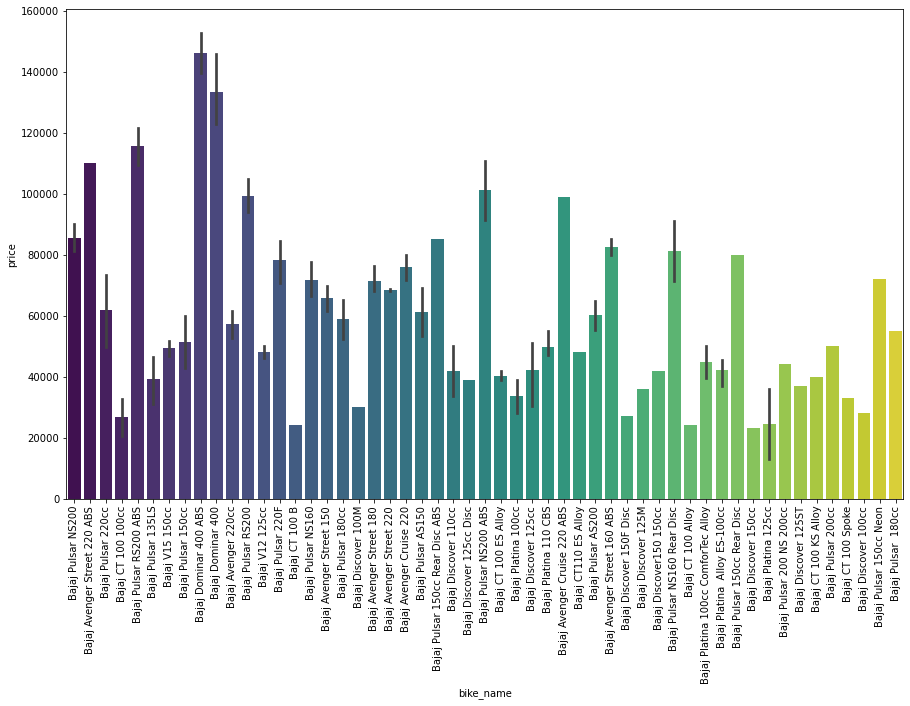

In [28]:
plt.figure(figsize=(15,9))
sns.barplot(data=first_owner_Bajaj,x='bike_name',y='price',palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

# Insights 
            
*  Bajaj Bikes Above 1,20,000 "Bajaj Dominar 400" & "Bajai Dominar 400 ABS
  
*  Bajaj Bikes Ranging from 40,000 to 60,000 Bajaj Discover, Bajaj CT100 & Bajaj Platina 125cc

*  Bajaj Bikes Ranging from 20,000 to 40,000 Bajaj Pulsar , Bajaj V15 , Bajaj Avenger & Bajaj Platina


 
             
             

In [29]:
BajajPulsarRS200=data_set_kms[data_set_kms["bike_name"]=='Bajaj Dominar 400 ABS']

## Compare the lowest kms_driven bikes for Bajaj Dominar 400 ABS and the best of kms_driven 800

In [30]:
BajajPulsarRS200.sort_values(by=["kms_driven"],ascending=True).head()

,bike_name,price,city,kms_driven,owner,age,power,brand
1874,Bajaj Dominar 400 ABS,140000.0,Jalandhar,800.0,First Owner,3.0,400.0,Bajaj
7528,Bajaj Dominar 400 ABS,138000.0,Hyderabad,1038.0,First Owner,3.0,400.0,Bajaj
7572,Bajaj Dominar 400 ABS,138000.0,Hyderabad,1038.0,First Owner,3.0,400.0,Bajaj
8316,Bajaj Dominar 400 ABS,160000.0,Mumbai,1320.0,First Owner,4.0,400.0,Bajaj
7093,Bajaj Dominar 400 ABS,164200.0,Kolkata,1600.0,First Owner,4.0,400.0,Bajaj


<AxesSubplot:xlabel='age'>

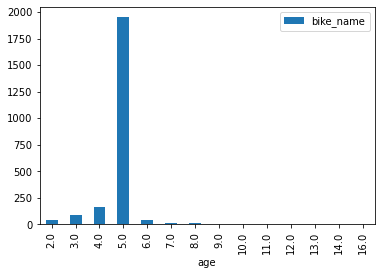

In [31]:
first_owner_Bajaj.groupby(['age'],as_index=False)['bike_name'].count().plot(kind='bar',x='age',y='bike_name')

# Insights

* Most of the Bajaj bikes were used for 5 years.


In [32]:
three_year_usedbike=first_owner_Bajaj[first_owner_Bajaj["age"]==3.0]

In [33]:
three_year_usedbike['bike_name'].nunique()

23

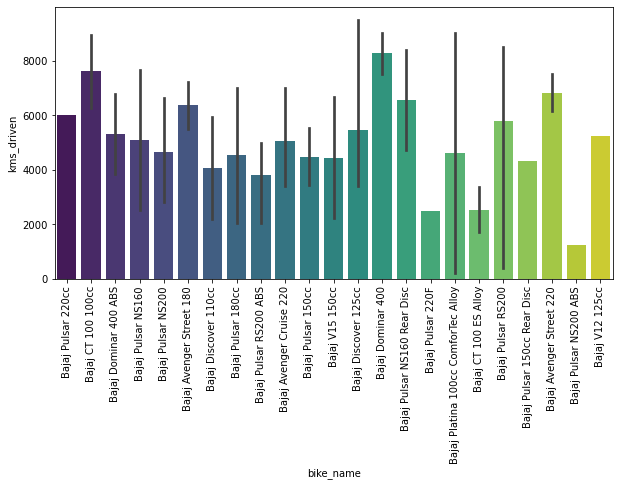

In [34]:
plt.figure(figsize=(10,5))

sns.barplot(data=three_year_usedbike,x='bike_name',y='kms_driven',palette='viridis')
plt.xticks(rotation='vertical')

plt.show()

<AxesSubplot:xlabel='bike_name'>

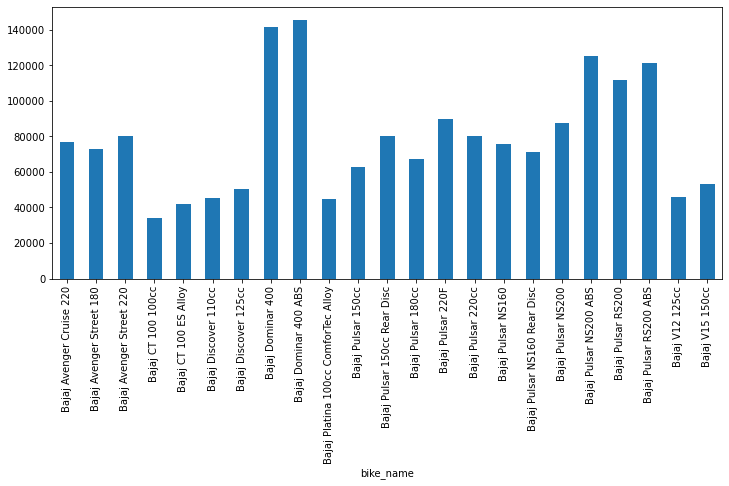

In [35]:
three_year_usedbike.groupby(['bike_name'])['price'].mean().plot(kind='bar',
                                                                figsize=(12,5), x='bike_name',y='price')

# Insights
* With segregation "Bajaj Dominar 400" & "Bajaj Dominar 400 ABS"  Bikes are Above 1,20,000 and Bajaj Dicover , Bajaj CT 100 ES ,Bajaj Platina 100cc , Bajaj V15 Bikes are between 40,000 to 60,000 
* Among the Three years used Bajaj bikes the average price of the model "Bajaj Dominar 400 ABS" is the highest.

In [36]:
a=three_year_usedbike.sort_values(by=["kms_driven"],ascending=True).head(10)
a

,bike_name,price,city,kms_driven,owner,age,power,brand
5111,Bajaj Platina 100cc ComforTec Alloy,50000.0,Hyderabad,200.0,First Owner,3.0,100.0,Bajaj
1528,Bajaj Pulsar RS200 ABS,138900.0,Delhi,280.0,First Owner,3.0,200.0,Bajaj
7116,Bajaj Pulsar RS200,106000.0,Bangalore,390.0,First Owner,3.0,200.0,Bajaj
2220,Bajaj Pulsar NS200,89000.0,Vijayawada,600.0,First Owner,3.0,200.0,Bajaj
2241,Bajaj Pulsar NS200,89000.0,Vijayawada,600.0,First Owner,3.0,200.0,Bajaj
1874,Bajaj Dominar 400 ABS,140000.0,Jalandhar,800.0,First Owner,3.0,400.0,Bajaj
7572,Bajaj Dominar 400 ABS,138000.0,Hyderabad,1038.0,First Owner,3.0,400.0,Bajaj
7528,Bajaj Dominar 400 ABS,138000.0,Hyderabad,1038.0,First Owner,3.0,400.0,Bajaj
2000,Bajaj V15 150cc,52000.0,Mumbai,1210.0,First Owner,3.0,150.0,Bajaj
7964,Bajaj Pulsar NS200 ABS,125000.0,Bangalore,1230.0,First Owner,3.0,200.0,Bajaj


# Insights
  
* The data Which I Have Collected does Show a large Number of Five-year-old bikes Compared to the 3-year-old bikes,but I prefer choosing 3-Year-old Bikes to satisfy my customers.  
     
* The above listed are the bikes those were less kilometer driven by the first owner`.


# Second owner

In [37]:
second_owner_Bajaj=bajaj_kms[bajaj_kms["owner"]=='Second Owner']

In [38]:
second_owner_Bajaj

,bike_name,price,city,kms_driven,owner,age,power,brand
327,Bajaj Avenger Cruise 220,55250.0,Pune,7781.0,Second Owner,3.0,220.0,Bajaj
2728,Bajaj V15 150cc,53000.0,Delhi,2792.0,Second Owner,5.0,150.0,Bajaj
3044,Bajaj Discover 125M,25000.0,Mumbai,6500.0,Second Owner,7.0,125.0,Bajaj
5138,Bajaj Avenger 220cc,50000.0,Jaipur,1234.0,Second Owner,7.0,220.0,Bajaj
5183,Bajaj Avenger 220cc,50000.0,Jaipur,1234.0,Second Owner,7.0,220.0,Bajaj
5645,Bajaj Avenger Cruise 220,70000.0,Yamuna Nagar,5200.0,Second Owner,4.0,220.0,Bajaj
7922,Bajaj Avenger 220cc,36000.0,Surat,10000.0,Second Owner,8.0,220.0,Bajaj
7939,Bajaj V15 150cc,42200.0,Ghaziabad,3325.0,Second Owner,5.0,150.0,Bajaj
8697,Bajaj Pulsar RS200,90000.0,Gurgaon,179.0,Second Owner,5.0,200.0,Bajaj
8742,Bajaj Pulsar RS200,95000.0,Rohtak,5000.0,Second Owner,4.0,200.0,Bajaj


In [39]:
bajaj_second_Bajaj=second_owner_Bajaj.groupby(['bike_name'],as_index=False)['price'].count()

<AxesSubplot:title={'center':'Bajaj_second_owner'}, ylabel='price'>

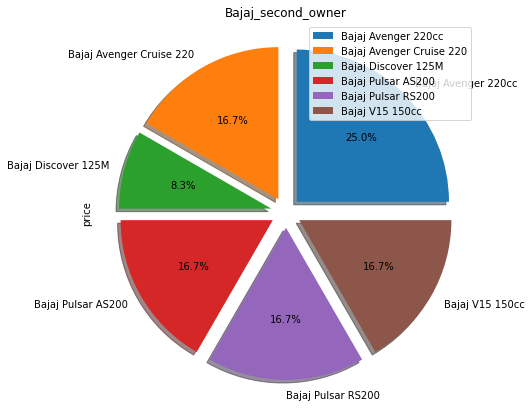

In [40]:
bajaj_second_Bajaj.plot.pie(title='Bajaj_second_owner',y='price',autopct='%1.1f%%',
           explode=(0.1,0.1,0.1,0.1,0.1,0.1),
           shadow=True,figsize=(8,7),labels=bajaj_second_Bajaj['bike_name'])


1.second ower bikes are very low . only 6 bikes are available in bajaj second ower bikes.

2.Three Bajaj Avenger 220cc bikes  available 




<AxesSubplot:xlabel='age'>

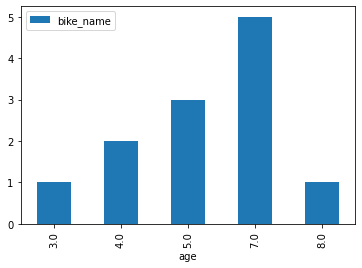

In [41]:
#find out the hightest years  of bikes

second_owner_Bajaj.groupby(['age']
    ,as_index=False)['bike_name'].count().plot(kind='bar',
                                    x='age',y='bike_name')

# Insights
        * The highest used in 7 years old  bikes         





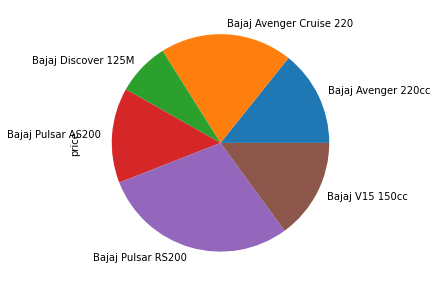

In [42]:
second_owner_bike_average =second_owner_Bajaj.groupby(['bike_name'])['price'].mean().plot(kind='pie'
                                                    ,figsize=(5,5),x='bike_name',y='price')

# Insights 

* Second owner bikes are totaly 12 bikes are available in the data set 
* The data second owner bike most profitable bike is Bajaj pulsar RS200 
               

# First_owner & Second owner (power and price) mean 

C:\Users\param\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='power', ylabel='price'>

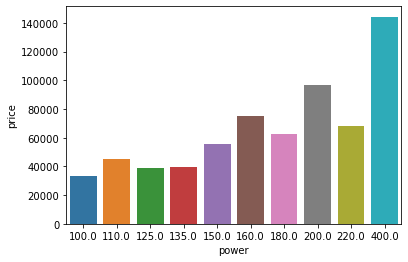

In [43]:
pow_price=first_owner_Bajaj.groupby(['power'])['price'].mean()
sns.barplot(pow_price.index,pow_price)

<AxesSubplot:xlabel='bike_name,power'>

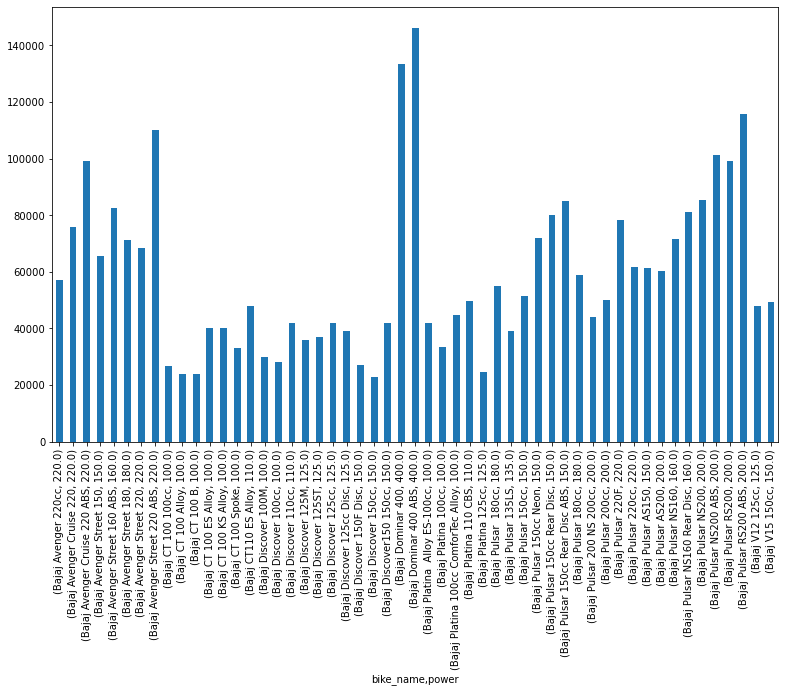

In [44]:
first_owner_Bajaj.groupby(['bike_name','power'])['price'].mean().plot(kind='bar',
                                                       figsize=(13,8))

<AxesSubplot:xlabel='bike_name,power'>

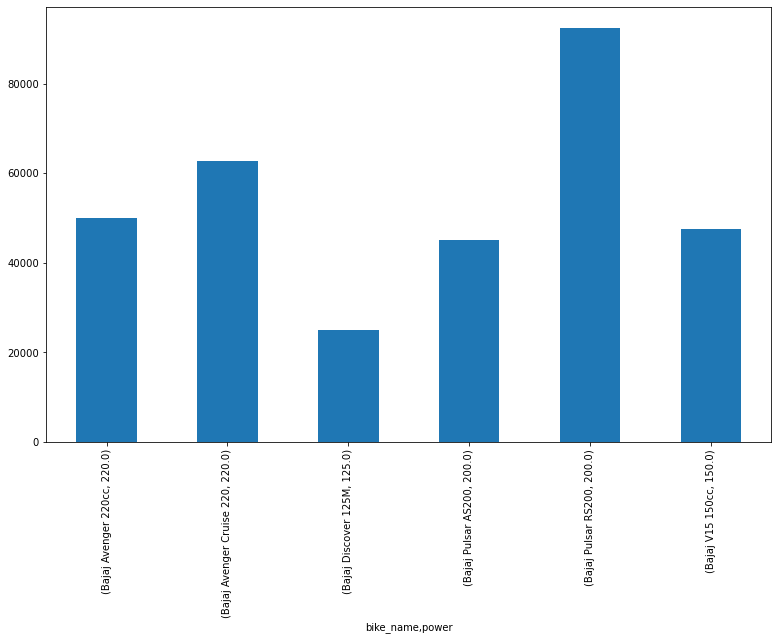

In [45]:
second_owner_Bajaj.groupby(['bike_name','power'])['price'].median().plot(kind='bar',
                                                                figsize=(13,8))

## Bikes under the  10000 prices 

In [46]:
data_set_price=df[df['price']<=10000]

In [47]:
first_owner_price=data_set_price[data_set_price["owner"]=='First Owner']

In [48]:
first_owner_price.shape

(657, 8)

In [49]:
first_owner_price.nunique()

bike_name     13
price         11
city          13
kms_driven    28
owner          1
age            9
power          5
brand          4
dtype: int64

In [50]:
data_set_price.sort_values(by=["price"],ascending=True).head(10)

,bike_name,price,city,kms_driven,owner,age,power,brand
4960,LML Freedom DX 110cc,4400.0,Godhara,55000.0,First Owner,16.0,110.0,LML
9194,Hero Ambition 135cc,5000.0,Delhi,82178.0,First Owner,18.0,135.0,Hero
9301,Hero Ambition 135cc,5000.0,Delhi,82178.0,First Owner,18.0,135.0,Hero
1382,TVS Flame 125cc,5800.0,Ghaziabad,25000.0,First Owner,13.0,125.0,TVS
1437,TVS Flame 125cc,5800.0,Ghaziabad,25000.0,First Owner,13.0,125.0,TVS
4922,Bajaj Pulsar 150cc,6400.0,Delhi,100000.0,First Owner,18.0,150.0,Bajaj
4923,Bajaj Pulsar 150cc,6700.0,Delhi,81000.0,First Owner,17.0,150.0,Bajaj
1384,Bajaj Pulsar 150cc,6890.0,Ghaziabad,68917.0,First Owner,16.0,150.0,Bajaj
1439,Bajaj Pulsar 150cc,6890.0,Ghaziabad,68917.0,First Owner,16.0,150.0,Bajaj
7610,Bajaj Pulsar 150cc,7000.0,Ahmedabad,80000.0,Third Owner,15.0,150.0,Bajaj


**Finally the above listed 10  bikes are cost efficient**

<AxesSubplot:xlabel='brand,power'>

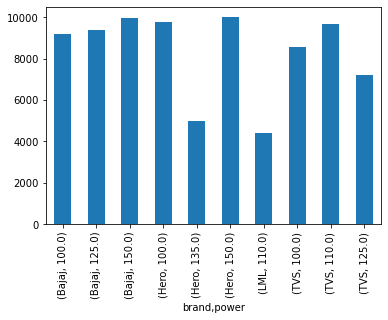

In [51]:
first_owner_price.groupby(['brand','power'])['price'].mean().plot(kind="bar")

# Insights

*  Bajaj  and  Hero and TVS  are cost efficient bikes




In [52]:
second_owner2=data_set_price[data_set_price["owner"]=='Second Owner']

In [53]:
second_owner2.nunique()

bike_name     12
price          6
city          11
kms_driven    13
owner          1
age            8
power          5
brand          6
dtype: int64

In [54]:
second_owner2.sort_values(by=["price"],ascending=True).head(10)

,bike_name,price,city,kms_driven,owner,age,power,brand
4743,Hero Honda Ambition 135cc,7500.0,Ahmedabad,100000.0,Second Owner,16.0,135.0,Hero
3366,Suzuki Heat 125cc,8000.0,Gurgaon,44030.0,Second Owner,15.0,125.0,Suzuki
7611,TVS Star Sport 100cc,8000.0,Faridabad,49730.0,Second Owner,11.0,100.0,TVS
4927,Hero CBZ Xtreme 150cc,9000.0,Delhi,62135.0,Second Owner,13.0,150.0,Hero
5625,Bajaj Pulsar 150cc,9000.0,Ghaziabad,67140.0,Second Owner,15.0,150.0,Bajaj
5636,Bajaj Pulsar 150cc,9000.0,Ghaziabad,67140.0,Second Owner,15.0,150.0,Bajaj
7115,Hero Splendor 100cc,9000.0,Surat,69000.0,Second Owner,17.0,100.0,Hero
374,TVS Apache 150cc,9350.0,Bangalore,39822.0,Second Owner,13.0,150.0,TVS
387,TVS Apache 150cc,9350.0,Bangalore,39822.0,Second Owner,13.0,150.0,TVS
4920,Yamaha Gladiator 125cc,9400.0,Ahmedabad,70000.0,Second Owner,12.0,125.0,Yamaha


**Finally the above listed 10  bikes are cost efficient and perfomance efficient**

<AxesSubplot:xlabel='brand,power'>

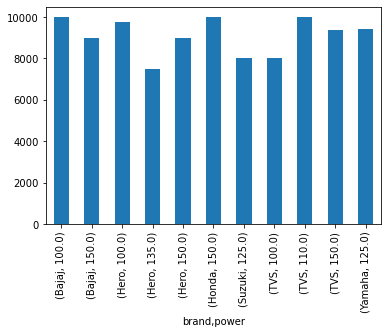

In [55]:
second_owner2.groupby(['brand','power'])['price'].mean().plot(kind="bar")

# Insights
               Bajai, Honda and TVS are cost efficient Bikes

In [56]:
data_pred=df

In [57]:
final_dataset=data_pred[['price','city','kms_driven',
            'owner','age','power','brand']]
final_dataset

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...
32643,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [58]:
Bike_Owner= {"owner":     {"First Owner": 1, "Second Owner": 2,
        "Third Owner":3,"Fourth Owner Or More":4}}
final_dataset_pred=final_dataset.replace(Bike_Owner)

In [59]:
final_dataset_pred

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3.0,110.0,TVS
1,119900.0,Delhi,11000.0,1,4.0,350.0,Royal Enfield
2,600000.0,Delhi,110.0,1,8.0,675.0,Triumph
3,65000.0,Bangalore,16329.0,1,4.0,180.0,TVS
4,80000.0,Bangalore,10000.0,1,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...
32643,39000.0,Delhi,22000.0,1,4.0,100.0,Hero
32644,30000.0,Karnal,6639.0,1,9.0,180.0,TVS
32645,60000.0,Delhi,20373.0,1,6.0,220.0,Bajaj
32646,15600.0,Jaipur,84186.0,1,16.0,125.0,Hero


In [60]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
final_dataset_pred['brand']= label_encoder.fit_transform(final_dataset_pred['brand'])
final_dataset_pred['city']= label_encoder.fit_transform(final_dataset_pred['city'])
print(final_dataset_pred.head())

      price  city  kms_driven  owner  age  power  brand
0   35000.0     6     17654.0      1  3.0  110.0     19
1  119900.0   118     11000.0      1  4.0  350.0     17
2  600000.0   118       110.0      1  8.0  675.0     20
3   65000.0    44     16329.0      1  4.0  180.0     19
4   80000.0    44     10000.0      1  3.0  150.0     21


## Numerical Distribution Plots

C:\Users\param\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\param\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\param\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='age', ylabel='Density'>

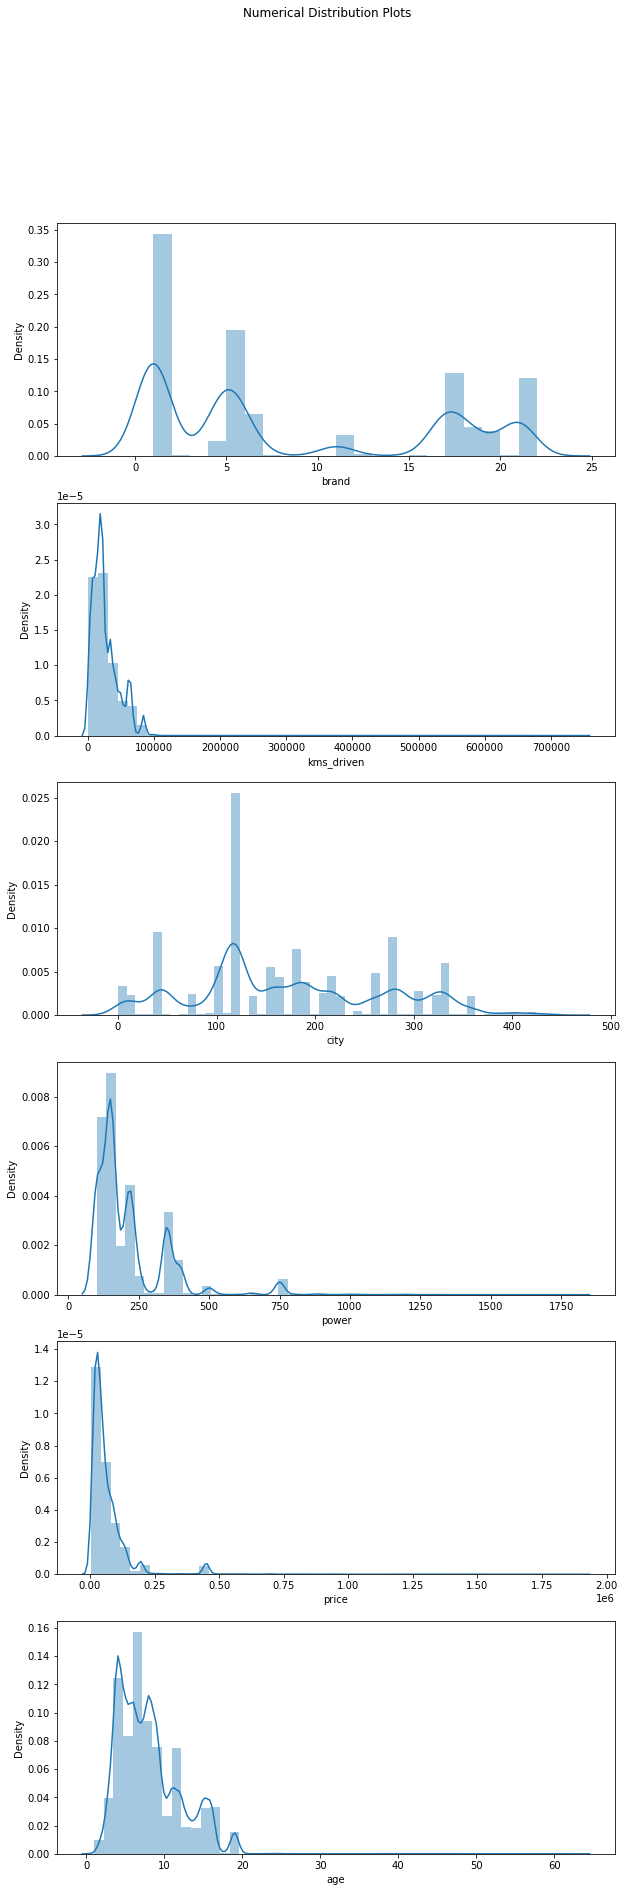

In [61]:
plt.figure(figsize=(10,30))
plt.suptitle("Numerical Distribution Plots")

plt.subplot(6,1,1)
sns.distplot(final_dataset_pred['brand'])

plt.subplot(6,1,2)
sns.distplot(final_dataset_pred['kms_driven'])

plt.subplot(6,1,3)
sns.distplot(final_dataset_pred['city'])

plt.subplot(6,1,4)
sns.distplot(final_dataset_pred['power'])

plt.subplot(6,1,5)
sns.distplot(final_dataset_pred['price'])

plt.subplot(6,1,6)
sns.distplot(final_dataset_pred['age'])

### From the density plot above the conclusions drawn is :

#### Among the brands in the dataset Bajaj is the maximum.
#### Among the city in the dataset delhi is the maximum.
#### Among the age 7 years and 5 years bikes is the maximum.
#### Among the kms_driven in the dataset 30000kms bikes are maximum.
#### Among the price in the dataset 1,20,000 bikes are maximum.

# linear regression

In [62]:
# separate the other attributes from the predicting attribut
x = final_dataset_pred.drop('price',axis=1)
#separte the predicting attribute into Y for model training 
y = final_dataset_pred['price'] 

In [63]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y,
                    test_size = 0.2, random_state = 42)

In [64]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [65]:
y_prediction =  LR.predict(x_test)
y_prediction

array([  5688.64867316,  25438.56179094,  16025.35191047, ...,
       431470.4251533 ,  41632.76033859,  93187.54213111])

In [66]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.739404902514871
mean_sqrd_error is== 2269641143.8374205
root_mean_squared error of is== 47640.750873988334


In [67]:
final_dataset_pred.sample()

,price,city,kms_driven,owner,age,power,brand
22872,70000.0,282,8000.0,1,5.0,220.0,1


In [68]:
y_prediction =  LR.predict([[118,48587.0,1,8.0,150.0,5]])
y_prediction

array([28625.99599061])

# Conclusion :

  **Dataset of Used Bikes and their Prices with features like power, Kilometers Driven etc**
  
  *This dataset contains around 32K records of used bike prices in India. The data has been collected from one of the leading online portals to sell used bikes in India via web scrapping*
      
      

      
  Totally 23 brands bikes are available . 
     
  Among all the brands of bikes Bajaj stands first in total count of bikes.
      
  So we can consider Bajaj bikes for our analysis.
      
  So the maximum of our bikes can be sold.
      
  compare the first owner and second owner  of bajaj brand bikes
  
  Among the brands in the dataset Bajaj is the maximum.
  
  Among the city in the dataset delhi is the maximum.
  
  Among the age 7 years and 5 years bikes is the maximum.
  
  Among the kms_driven in the dataset 30000kms bikes are maximum.
  
  Among the price in the dataset 1,20,000 bikes are maximum.
  
  
  

1)Among the Three years used Bajaj bikes the average price of the model "Bajaj Dominar 400 ABS" is the highest.
  
  2)The data Which I Have Collected does Show a large Number of Five-year-old bikes Compared to the 3-year-old bikes,  
  but I prefer choosing 3-Year-old Bikes to satisfy my customers. 
  
  3)The data second owner bike most profitable bike is Bajaj pulsar RS200.
      
 

## Hence Bajaj Bikes are Cost Efficient and Reliable for the Customers.

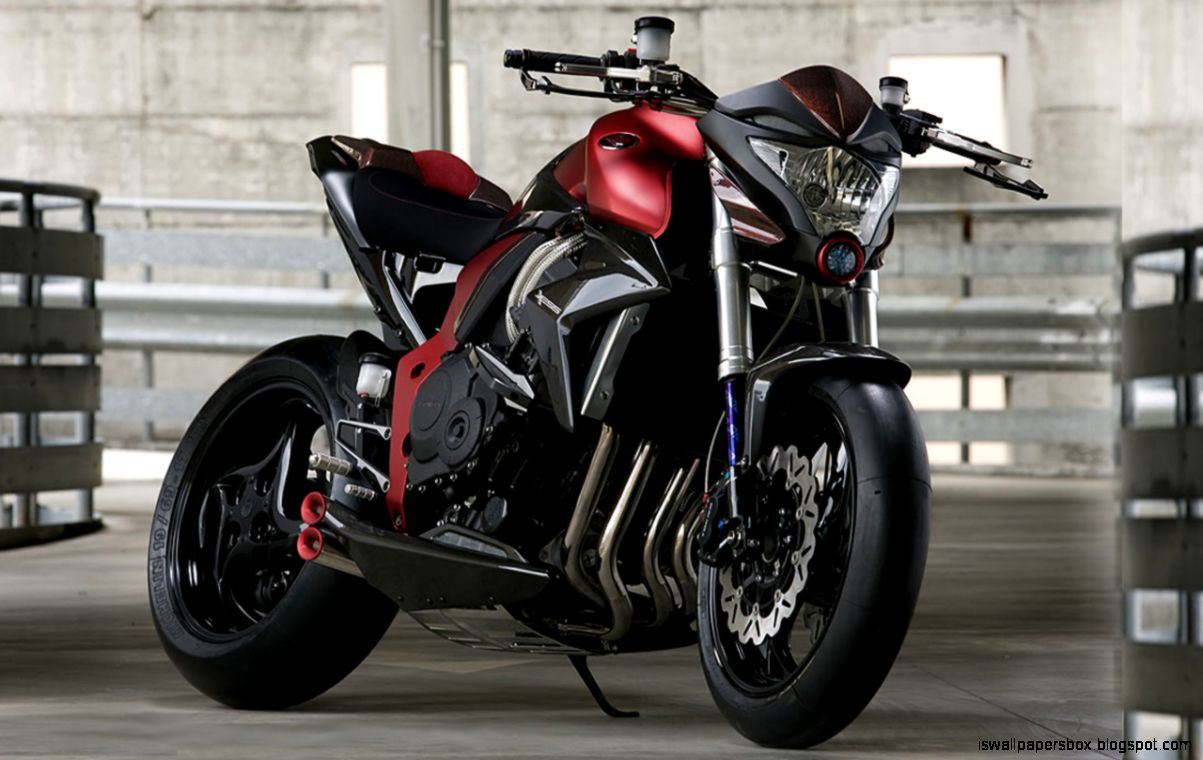